<h1>PRÁCTICA 1 - FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO</h1>
<h3>Realizada la práctica por:<br/>
    <ol>
    -Pablo Díez del Pozo<br/>
    -Alejandro Alcalá Álvarez
    </ol>
 </h3>
<h3>Grupo: 1461</h3>
<h3>Pareja: 01</h3>

In [114]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

<h3>Importaciones necesarias para la ejecucion del código</h3>
<p>Podemos observar todos los import necesarios que tenemos que realizar para que la ejecución de nuestro codigo funcione a la perfección, a continuación, explicaremos cada uno de los imports y para que son necesarios:</p>
<ol>
    <li>Random: se utiliza para hacer las secuencias de índices aleatorios para las particiones de entrenamiento y de clasificación.
    <li>Math: se utiliza para hacer la distribución normal para los atributos que sean continuos y asi poder calcular su probabilidad.
    <li>Numpy: Es la libreria mas utilizada en esta práctica, debido a que almacenamos los datos en una matriz numpy y guardamos las probabilidades posterioris de los atributos en un array de matrices de numpy.
    <li>ABC: se utiliza para haces clases y métodos abstractos.
    <li>Datos: se utiliza para importar toda la funcionalidad de nuestro modulo Datos.
    <li>Collections: se utiliza para contabilizar las probabilidades condicionadas y para ver cuantas clases hay en el fichero
    <li> SortedDict: se utiliza para ordenar el diccionario que creamos con las probabilidades a priori de cada clase
    <li>Sklearn: se utiliza para hacer el tercer apartado de esta práctica, donde nos da una implementación del algoritmo de Naive-Bayes
    <li>Pyplot: se utiliza en el último apartado de la práctica, donde nos da una implementación para pintar la curva ROC.
     

In [115]:
import random
import math
import numpy as np
from abc import ABCMeta, abstractmethod
from Datos import Datos
from collections import Counter
from sortedcontainers import SortedDict
from sklearn.metrics import confusion_matrix, auc
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from EstrategiaParticionado import Particion

<h3>Obtener los datos de los Distintos Dataset</h3>
<p>Aqui vamos a poder observar como vamos a codificar los datos que nos dan en un fichero a una matriz Numpy para poder tratar los datos para poder entrenarlos y clasificarlos con Naive-Bayes</p>
<p>Vamos a ver como llamando a la clase Datos y que en su constructor le ponemos la ruta del fichero se crea la matriz numpy de los datos, pero a demás de esa matriz también guardamos información necesaria para poder entrenarlos y clasificarlos correctamente. Por ejemplo, guardamos si los atributos son continuos o discretos.</p>
<p>A continuación, vamos a mostrar una ejecución para cada uno de los conjuntos de datos que nos dan para hacer Naive-Bayes. En la celda de abajo vereis la ejecución.</p>

In [116]:
dataset = Datos('../Datasets/lenses.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS LENSES=====================")
print(dataset.datos)
print("============================================================================")

['Age', 'Spectacle', 'Astigmatic', 'Tear', 'Class']
[{'1': 0, '2': 1, '3': 2}, {'1': 0, '2': 1}, {'1': 0, '2': 1}, {'1': 0, '2': 1}, {'1': 0, '2': 1, '3': 2}]
==============MATRIZ NUMPY DEL CONJUNTO DE DATOS LENSES=====================
[[0. 0. 0. 0. 2.]
 [0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 2.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 2.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 2.]
 [0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 2.]
 [1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 2.]
 [1. 0. 1. 1. 0.]
 [1. 1. 0. 0. 2.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 2.]
 [1. 1. 1. 1. 2.]
 [2. 0. 0. 0. 2.]
 [2. 0. 0. 1. 2.]
 [2. 0. 1. 0. 2.]
 [2. 0. 1. 1. 0.]
 [2. 1. 0. 0. 2.]
 [2. 1. 0. 1. 1.]
 [2. 1. 1. 0. 2.]
 [2. 1. 1. 1. 2.]]


In [117]:
dataset2 = Datos('../Datasets/tic-tac-toe.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS TIC-TAC-TOE================")
print(dataset2.datos)
print("============================================================================")

['TLeftSq', 'TMidSq', 'TRightSq', 'MLeftSq', 'MMidSq', 'MRightSq', 'BLeftSq', 'BMidSq', 'BRightSq', 'Class']
[{'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'negative': 0, 'positive': 1}]
==============MATRIZ NUMPY DEL CONJUNTO DE DATOS TIC-TAC-TOE================
[[2. 2. 2. ... 1. 1. 1.]
 [2. 2. 2. ... 2. 1. 1.]
 [2. 2. 2. ... 1. 2. 1.]
 ...
 [1. 2. 1. ... 1. 2. 0.]
 [1. 2. 1. ... 1. 2. 0.]
 [1. 1. 2. ... 2. 2. 0.]]


In [118]:
dataset3 = Datos('../Datasets/german.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS GERMAN=====================")
print(dataset3.datos)
print("============================================================================")

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'Class']
[{'A11': 0, 'A12': 1, 'A13': 2, 'A14': 3}, {}, {'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}, {'A40': 0, 'A41': 1, 'A410': 2, 'A42': 3, 'A43': 4, 'A44': 5, 'A45': 6, 'A46': 7, 'A48': 8, 'A49': 9}, {}, {'A61': 0, 'A62': 1, 'A63': 2, 'A64': 3, 'A65': 4}, {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}, {}, {'A91': 0, 'A92': 1, 'A93': 2, 'A94': 3}, {'A101': 0, 'A102': 1, 'A103': 2}, {}, {'A121': 0, 'A122': 1, 'A123': 2, 'A124': 3}, {}, {'A141': 0, 'A142': 1, 'A143': 2}, {'A151': 0, 'A152': 1, 'A153': 2}, {}, {'A171': 0, 'A172': 1, 'A173': 2, 'A174': 3}, {}, {'A191': 0, 'A192': 1}, {'A201': 0, 'A202': 1}, {'1': 0, '2': 1}]
==============MATRIZ NUMPY DEL CONJUNTO DE DATOS GERMAN=====================
[[ 0.  6.  4. ...  1.  0.  0.]
 [ 1. 48.  2. ...  0.  0.  1.]
 [ 3. 12.  4. ...  0.  0.  0.]
 ...
 [ 3. 12.  2. ...  0.  0.  0.]
 [ 0. 45.  2. ... 

<h3>Apartado 1: Estrategia de Particionado</h3>
<p>En este apartado vamos a probar las dos estrategias de particionado de los datos que hemos tenido que implementar en esta práctica, las cuales son:</p>
    <ol>
        <p>- Validación Simple.</p>
        <p>- Validación Cruzada.</p>
    </ol>
<p>Nuestra estrategia de <strong>validación simple</strong> consiste en meterle un porcentaje por el cual queremos dividir el conjunto de datos en dos subconjuntos de datos, donde uno lo vamos a utilizar para entrenar y el otro lo vamos a utilizar para hacer la predicción con nuestro clasificador. En la celda de abajo mostraremos el código necesario para poder realizar correctamente la validacion simple.</p>
<p>Como podemos observar en el código de abajo de validación simple, lo que hacemos es que ponemos una semilla a random y decimos que el numero de particiones va a ser uno. A continuación, haremos un permutacion de numeros aleatorios entre el 0  y el número de datos que hay en el fichero. Por ultimo, lo que hacemos es que le creamos la partición que va a tener en su interior los dos subconjuntos de Train y Test. En esa permutación lo multiplicamos por el porcentaje que le hemos dado nosotros para crear los dos suboconjuntos.</p>
<p>Debajo de esta celda vamos a comprobar en como funciona  la validación simple con diferentes porcentajes para obtener el subconjunto de datos de Train y Test, en los diferentes conjuntos de datos </p>

In [119]:
class Particion():

  # Esta clase mantiene la lista de �ndices de Train y Test para cada partici�n del conjunto de particiones
  def __init__(self, train=[], test=[]):
    self.indicesTrain = train
    self.indicesTest = test

  def __str__(self):
    return "Train: {}\nTest:  {}".format(str(self.indicesTrain), str(self.indicesTest))

class EstrategiaParticionado:
  # Clase abstracta
  __metaclass__ = ABCMeta

  # Lista de las particiones
  def __init__(self, nombre=""):
    self.nombreEstrategia = nombre
    self.numeroParticiones = 0
    self.particiones = []

  # Atributos: deben rellenarse adecuadamente para cada estrategia concreta: nombreEstrategia, numeroParticiones, listaParticiones. Se pasan en el constructor

  @abstractmethod
  # TODO: esta funcion deben ser implementadas en cada estrategia concreta
  def creaParticiones(self, datos, seed=None):
    pass

class ValidacionSimple(EstrategiaParticionado):

  def __init__(self, porcentaje):
    self.porcentaje = porcentaje
    super().__init__("Validacion simple")

  # Crea particiones segun el metodo tradicional de division de los datos segun el porcentaje deseado.
  # Devuelve una lista de particiones (clase Particion)
  # TODO: implementar
  def creaParticiones(self, datos, seed=None):

    np.random.seed(seed)
    self.numeroParticiones = 1

    # Generamos una lista con todos los números de datos aleatorios
    indicesAleatorios = np.random.permutation(int(datos.numDatos))

    # Creamos la particion, en funcion del porcentaje especificado
    self.particiones = [Particion(indicesAleatorios[:int(datos.numDatos * self.porcentaje)],
                                  indicesAleatorios[int(datos.numDatos * self.porcentaje):])]

    return self.particiones

In [120]:
print("==============VALIDACIÓN SIMPLE CON LENSES DATA 70%======================")
estrategia = ValidacionSimple(0.7)
estrategia.creaParticiones(dataset)
print(estrategia.particiones[0])
print("=========================================================================")

==============VALIDACIÓN SIMPLE CON LENSES DATA 70%======================
Train: [ 7 20 21 15  9 12 16  6  5  2 13 19 22 10  8 23]
Test:  [ 1  3 17  4 11  0 14 18]


In [121]:
print("==============VALIDACIÓN SIMPLE CON TIC-TAC-TOE DATA 80%=================")
estrategia2 = ValidacionSimple(0.8)
estrategia2.creaParticiones(dataset2)
print(estrategia2.particiones[0])
print("=========================================================================")

==============VALIDACIÓN SIMPLE CON TIC-TAC-TOE DATA 80%=================
Train: [811 181 675 308 636 261  46 396  36 133 932 216 554 355 123 672 363 860
 338 279 242 903 478 459 524 590 722  40 158 885   0 946 205  20 948 407
  82 424 190 367 434 847 416 794 788 413 613 170 765 716  63 100 567 781
 237 185  35 498 589 194 925 575 196 232 448 844 913 311 851 544 323 166
 700 378 420 624 379  28 922 752 445 376 902  85 711 428 877 410 573 425
 865 160 868 583 485 874 869 952 270 806 442 260 879 221 661 455 600 841
 427 169 920 547 890 210 527 741 225 585 138 288  96 618 674 400 394 786
 668 904 912 746 368 258   4 521   6 460 360 663  78 873   3 894 484 334
 650 723 415 239 336 104 803 273 616 384 245 107 802 499 316 715  51 692
 783 347  23  57 191 557 625 878 236 836  14 431  22  88 676 110 106 218
 858  48 361 792 300 884 924 562 418 779 536 823 492 480  33 768 771  41
 451 705 821 165 572 530 807  37 204  18 703 647  45 281 102 345 532 189
 883 956 772 153 295 937 409 292 655 533 66

In [122]:
print("==============VALIDACIÓN SIMPLE CON GERMAN DATA 75%======================")
estrategia3 = ValidacionSimple(0.75)
estrategia3.creaParticiones(dataset3)
print(estrategia3.particiones[0])
print("=========================================================================")

==============VALIDACIÓN SIMPLE CON GERMAN DATA 75%======================
Train: [ 75 420 456 552  91  86 961 583  54 389 517 304 651 309 648  94 497 436
 247 437 685 318 992 884 557 134 661 687 356 211 585   8 206 172 530  43
 135 974 857 173 596 153 198 313 237 745 438 466 191 904 448 951  15 233
 546 725 724  68 491 925  89 386 742 795  31 921 699 756 608  13 791 182
 196 949 174 238 874 178 654 284 314 996 162 161 882 828 788 638 505  23
 683 993 186 280 729 332 395 767 911 115 525 588 948 305 535 812 662 595
 287 259 276 682 279 251 264 885 605 880 753   2 793 269 388 623 780 190
 220 796 548  76  34 543 918 516 726 183 319 749 240 580 633 710 320 816
 156 168 979 316 124 790 550 872 641 426 490 261 772   5 900 864 747 989
 486 128 397 923 416 392 936 422 774 234 680 834 419 340 230 855 462 154
 773 676 807 679 696 518 870 647 681 674 672 646 740 642  57 750 536 219
 582 738 732 470 565 361 489  96 380 659 587 760 971 939 363 558 808 167
 898 399 555 982 322  39 324 249  83 200 56

<p>Nuestra estrategia de <strong>validación cruzada</strong> consiste en dividir nuestro conjunto de datos en particiones de Train y Test como en validación simple, pero este proceso lo vamos a hacer K veces, para que todos los datos esten presenten en los dos subconjunto de datos para poder obtener una mejora a la hora de entrenar y clasificar.A continuación, mostraremos nuestra implementación de la validación cruzada; donde vamos a hacer K veces las divisiones del conunto de datos y si por algún motivo nuestra división de todos los subconjuntos no es perfecta balancearemos los datos sobrantes para poder entrenarlos y clasificarlos.</p>

In [123]:
class ValidacionCruzada(EstrategiaParticionado):

  # Crea particiones segun el metodo de validacion cruzada.
  # El conjunto de entrenamiento se crea con las nfolds-1 particiones y el de test con la particion restante
  # Esta funcion devuelve una lista de particiones (clase Particion)
  # TODO: implementar

  def __init__(self, k):
    self.k = k
    super().__init__("Validacion cruzada")

  def creaParticiones(self, datos, seed=None):
    np.random.seed(seed)

    self.numeroParticiones = self.k

    # Generamos una lista con todos los números de datos aleatorios
    indicesAleatorios = np.random.permutation(int(datos.numDatos))

    # Hallamos el tamaño de cada bloque
    tamBloque = int(datos.numDatos / self.k)

    datosSobran = datos.numDatos - (tamBloque * self.k)
    count = 0
    for i in range(self.k):

      train = np.delete(indicesAleatorios, range(i * tamBloque, (i + 1) * tamBloque))
      test = indicesAleatorios[i * tamBloque:(i + 1) * tamBloque]

      # Caso en el que la cuenta es justa
      if datosSobran == 0:
        self.particiones.append(Particion(train, test))

      # Contemplamos el caso de que la division para sacar el numero de subconjuntos no fuese entera
      if datosSobran > 0:
        count += 1
        particionTest = np.append(test, train[(datos.numDatos - tamBloque) - i - 1])
        particionTrain = np.delete(train, (datos.numDatos - tamBloque) - i - 1)
        datosSobran -= 1
        self.particiones.append(Particion(particionTrain, particionTest))

<p>A continuación, mostraremos la ejecución de nuestra estrategia de partcionado validación simple o también llamada K-fold, con los diferentes conjuntos de datos y con diferentes K's. Vamos poder observar en la salida de nuestra celda que todos los valores van a estar una vez en la partición de Test.</p>


In [124]:
print("==============VALIDACIÓN CRUZADA CON LENSES DATA K=5======================")
estrategia1 = ValidacionCruzada(5)
estrategia1.creaParticiones(dataset)
for particion in estrategia1.particiones:
    print(particion)
print("==========================================================================")

==============VALIDACIÓN CRUZADA CON LENSES DATA K=5======================
Train: [ 3  4  0 16 18  7  5 20 21  2  1  8 15 22 11  9 13 17 12]
Test:  [10  6 14 23 19]
Train: [10  6 14 23 18  7  5 20 21  2  1  8 15 22 11  9 13 17 19]
Test:  [ 3  4  0 16 12]
Train: [10  6 14 23  3  4  0 16 21  2  1  8 15 22 11  9 13 12 19]
Test:  [18  7  5 20 17]
Train: [10  6 14 23  3  4  0 16 18  7  5 20 15 22 11  9 17 12 19]
Test:  [21  2  1  8 13]
Train: [10  6 14 23  3  4  0 16 18  7  5 20 21  2  1  8 13 17 12 19]
Test:  [15 22 11  9]


In [125]:
print("==============VALIDACIÓN CRUZADA CON TIC-TAC-TOE DATA K=8=================")
estrategia21 = ValidacionCruzada(8)
estrategia21.creaParticiones(dataset2)
for particion in estrategia21.particiones:
    print(particion)
print("=========================================================================")

==============VALIDACIÓN CRUZADA CON TIC-TAC-TOE DATA K=8=================
Train: [206 207 216 300 373 517 943  42 667 935 940 393 491 369  57 925 578 611
 155 108 548  11 840 475 819 926 304 428 760 946 866 503 790 433 624 283
 581 359 337 161 147 122 702 250 771 550 212 232 816 750  96 195 196 201
 116 932 443 631 172 847 916  48 361 170 527 506 869 162 878 200 228 171
 852 906 400 662 312  12 106 787 289 129 246 755 762 240 438 107 131 377
 204 556 421 407 348 687 436 198 786 394 917 457 307 264 748 623 754 807
  41 922 895 779 513 703 856 309 633 482 686 764 603 222  51 814 128  19
 681 214 123 473 247 353 190 868 579 811 330 351 514 328  82 891  89 618
 367  10 125 219 220 820 695 930 310 730 728 836 453 838 931 485 208 256
 526  35 403 104 301 487 376 455 706 657 164 746 285 143 661 904 305 469
 145  23 912 770 756 689 467 479 102 883 685 612 414 531 313 148  50 317
 409 785 718 886 948 463 372 766 352 260 798 660 942 366 574 731 461  79
 458 957 519 160 397 547 395 186 380 385 1

In [126]:
print("==============VALIDACIÓN CRUZADA CON GERMAN DATA K=4=====================")
estrategia31 = ValidacionCruzada(4)
estrategia31.creaParticiones(dataset3)
for particion in estrategia31.particiones:
    print(particion)
print("=========================================================================")

==============VALIDACIÓN CRUZADA CON GERMAN DATA K=4=====================
Train: [751 694 457 225 222 217 625 265 811 238 244 211  83 988 237 183 429 453
 204 481 762 214 717 138  77 142 722 420 621 843 385 916 110 461 521 522
 159 696 891 513 948 103 723 865 504 690 277 346 127 962 795 169 800 386
 676 392 812 758 188  80 326 422 179  82 956 325 477 510 443 602 270 182
 317 414 649 714 153  47 875 257 921 235 200 299 815 878 688 454 929 683
 659 295 985 166 170 894 403 949 609 311 960 989 681 944 470 700 215 667
 234 946 579 517 430  17 267 490 871 463 464 798 117 852 616 650 114  93
  50 786 116 102 113  15 639 716 508 701 958  87 415 882 668 365 458 687
 389 534 193 537 181 790 502 273 280 684 905  43 673 987 332 746 831 775
 749 919 160 991 298 594 407 997 586 726 662 580 287 336 776 766 220 395
  13 952 638 589 227 931 876  20 821 885 654 151 210 899 814 699 236 597
 898 582 139 496 617 604 636 702 178  54  23 733 285 951 647 902 566 307
 672  76 136 670 320 375 540 351 734 710 79

<h3>Apartado 2: Naive-Bayes</h3>
<p>Es un clasificador de datos que se basa en la regla de Bayes. Donde primero vamos a dividir el conjunto de datos y poder particionarlo en dos subconunto de datos con validación simple o en varios subconjunto de datos con validación cruzada. En el código que mostramos a continuación es lo que van hacer todos los clasificadores que podemos implementar. Los métodos de entrenamiento y clasifica cada clasificador lo hace el clasificador debido a que los métodos que van a utilizar son únicos y los tenemos que implementar en las clases especificas de cada clasificador.</p>
<p>El método <strong>error</strong> va a comprobar los errores que ha obtenido nuestro clasificador, para ver el error que hemos obtenido se hace comparando la última columna de nuestra matriz de datos con la predicción que hemos obtenido en el método de clasifica del clasificador. Si es dintinto la predicción con la última columna de los datos le sumamos uno y lo vamos a dividir entre el número de lineas que tiene el subconjunto de datos Test.</p>
<p>El método <strong>validación</strong> lo que va hacer es realizar los métodos de entrenamiento, clasifica y calcula error del clasificador seguido sin ninguna interrupcion. El método va a comprobar si le estan pasando validación simple o cruzada con el número de partciones que tiene. Si el tamaño es igual a 1 va a llamar a los métodos mencionados anteriormente y va a devolver el error que ha obtenido tras el entrenamiento y la clasificación. Si el tamaño es mayor a 1 hacemos un bucle que cubra todas las partciones para entrenarlas, clasificarlas y obtener su error, despues de la realización de esos métodos vamos a hacer la media aritmetica de todos los errores obtenidos con las diferentes particiones que tenemos en nuestra estrategia.</p>

In [127]:
class Clasificador:
  # Clase abstracta
  __metaclass__ = ABCMeta

  # Metodos abstractos que se implementan en casa clasificador concreto
  @abstractmethod
  # TODO: esta funcion debe ser implementada en cada clasificador concreto
  # datosTrain: matriz numpy con los datos de entrenamiento
  # atributosDiscretos: array bool con la indicatriz de los atributos nominales
  # diccionario: array de diccionarios de la estructura Datos utilizados para la codificacion de variables discretas
  def entrenamiento(self, datos, datosTrain, atributosDiscretos, diccionario):
    pass

  @abstractmethod
  # TODO: esta funcion debe ser implementada en cada clasificador concreto
  # devuelve un numpy array con las predicciones
  def clasifica(self, datosTest, atributosDiscretos, diccionario):
    pass

  # Obtiene el numero de aciertos y errores para calcular la tasa de fallo
  # TODO: implementar
  def error(self, datos, pred):
    # Aqui se compara la prediccion (pred) con las clases reales y se calcula el error
    i = 0
    real = datos[:, -1]
    error = 0
    for i in range(len(real)):
      if real[i] != pred[i]:
        error += 1
    err = (error) / (len(real) + 0.0)
    return err

  # Realiza una clasificacion utilizando una estrategia de particionado determinada
  # TODO: implementar esta funcion
  def validacion(self, particionado: object, dataset: object, clasificador: object, seed: object = None) -> object:

    # Creamos las particiones siguiendo la estrategia llamando a particionado.creaParticiones
    # - Para validacion cruzada: en el bucle hasta nv entrenamos el clasificador con la particion de train i
    # y obtenemos el error en la particion de test i
    # - Para validacion simple (hold-out): entrenamos el clasificador con la particion de train
    # y obtenemos el error en la particion test. Otra opci�n es repetir la validaci�n simple un n�mero especificado de veces, obteniendo en cada una un error. Finalmente se calcular�a la media.
    errores = 0
    # particionado.creaParticiones(dataset, seed)
    # Comprobamos si es por validación cruzada o simple, por la longitud de la lista de particiones

    particionado.creaParticiones(dataset)

    # Validación Simple
    if len(particionado.particiones) == 1:
      clasificador.entrenamiento(dataset, particionado.particiones[0].indicesTrain)
      pred = clasificador.clasifica(dataset, particionado.particiones[0].indicesTest)
      ret = self.error(dataset.extraeDatos(particionado.particiones[0].indicesTest), pred)
      if ret > 0:
        return ret
      else:
        return 0

    # Validación Cruzada
    else:
      for particion in particionado.particiones:
        clasificador.entrenamiento(dataset, particion.indicesTrain)
        pred = clasificador.clasifica(dataset, particion.indicesTest)
        ret = self.error(dataset.extraeDatos(particion.indicesTest), pred)
        errores += ret
      error = errores / len(particionado.particiones)

      # Devolucion de la media de los errores
      return error

  def matrizConfusion(self, dataset, datosTest, prediccion):

    # Calculamos la matriz de confusion utlizando sk-learn. Solo se calcula en el caso de que la clasificacion sea binaria.
    testData = dataset.extraeDatos(datosTest)
    clase_real = testData[:, -1]

    matriz = confusion_matrix(prediccion, clase_real)

    # La funcion ravel() devuelve todas las estadisticas relacionadas con la matriz de confusion
    tn, fp, fn, tp = matriz.ravel()


    # Calculamos las tasas extraídas de la matriz de confusión
    tpr = tp / (tp + fn)
    fpr = fp / (fp + fn)

    self.lista_tpr.append(tpr)
    self.lista_fpr.append(fpr)

    return matriz

  def curvaROC(self):

    x = np.linspace(0, 1, 100)
    plt.plot(x, x, c='blue')
    for i in range(len(self.lista_fpr)):
        plt.plot(self.lista_fpr[i],self.lista_tpr[i],'ro')
    plt.show()


<h3>Implementación del Clasificador Naive-Bayes</h3>
<p>En la siguiente celda vamos a poder observar el codigo de entrenamiento y clasifica del clasificador de Naive-Bayes, a continuación explicaremos brevemente el funcionamiento de cada uno de los métodos especificos del clasificador. En este claisificador podemos aplicar la regla de Laplace, que es si obtenemos un cero en algunas de las mátrices de conteos de los datos, es decir, a la hora de calcular P(D|H), tendremos que sumar 1 a todas las celdas de conteos de esa P(D|H).</p>
<p>El método <strong>entrenamiento</strong>, lo primero que hace este método es obtener las probabilidades a priori de las clases que hay en el subconjunto de Test. Al calcular esas probabbilades las introducimos en un diccionario para poder utilizarlas más tarde. Ahora vamos a calcular la P(D|H)que se va a calcular de diferentes maneras para datos continuos o discretos
    <ol>
        <li><strong>Atributos discretos</strong>: se calcula haciendo los conteos de las veces que sale la P(D|H) en el subconjunto de datos Train.</li>
        <li><strong>Atributos continuos</strong>: se calcula la media y desviación tipica del subconjunto de datos Train.</li>
    </ol>
Todo esto se mete en una matriz que tiene los diferentes datos y las diferentes clases del conjunto de datos, donde esa matriz la vamos a utilizar para calcular las probabilidades a posteriori con todos las datos que tiene las matrices que hemos creado.</p>
<p>El método <strong> clasifica</strong> dependiendo de los datos que vamos obteniendo del subconjunto de datos de Test, y vamos a obtener las diferentes probabilidades de las distintas clases que tenemos el problema si nos llega ese dato. Esas probabilidades las guardamos en una lista para luego multiplicarlas por los a priori y poder coger la clase que de más probabilidad para guardarla en la lista de las predicciones de nuestro clasificador Naive-Bayes y así despues obtener el error que hemos obtenenido. Este método tambien clasifica de manera distinta los atributos discretos y continuos:
    <ol>
        <li><strong>Atributos discretos</strong>: se calcula obteniendo el número que hay en la matriz de probabilidades a posteriori que hemos creado anteriormente.</li>
        <li><strong>Atributos continuos</strong>: se calcula haciendo la ecuación de la distribución normal.
   </ol>
 </p>

In [128]:
class ClasificadorNaiveBayes(Clasificador):

  def __init__(self, laplace):
    self.laplace = laplace
    self.lista_fpr = []
    self.lista_tpr = []

  def entrenamiento(self, dataset, datosTrain):

    # Cargamos todos los datos de la clase del dataset desde la matriz de datos
    clasesTrain = dataset.extraeDatos(datosTrain)
    self.numClases = clasesTrain[:, -1]

    # Contamos las apariciones de cada uno para luego calcular la probabilidad a priori de cada clase
    counter = Counter(self.numClases)

    # Calculamos la probabilidad de la clase y lo metemos en un diccionario ordenado segun el numero
    # correspondiente a cada clase asignado en el diccionario
    self.dictPrioris = {}
    for k in counter:
      k = int(k)
      counter[k] = counter[k] / len(self.numClases)
      self.dictPrioris[k] = counter[k]

    # Aqui ordenamos el diccionario para que esten en el mismo orden de como extraemos los datos del dataset
    self.dictPrioris = SortedDict(self.dictPrioris)

    # Calcular tablas de probabilidades del entrenamiento. Tenemos que calcular por cada atributo una cuenta
    # de las apariciones en cada clase
    # Creamos una lista de matrices, donde vamos almacenar todos los datos que hemos obtenido en los datos de Test
    self.posteriori = np.zeros(len(dataset.nombreAtributos) - 1, dtype=object)

    # Recorremos todos los datos de la matriz sin llegar a la clase
    for i in range(len(dataset.nombreAtributos) - 1):

      # Si el dato que obtenemos es Nominal haremos el recuento de todas las veces que sale la P(D|H)
      if dataset.nominalAtributos[i] == True:

        # Creamos una matriz de tamaño X: Número de Atributos menos la clase Y: Número de clases
        post = np.zeros((len(dataset.listaDicts[i]), len(dataset.listaDicts[-1])))

        # Aqui contamos todos las datos que queremos del datos Train para construir la matriz de entrenamiento
        for c in range(len(dataset.listaDicts[-1])):
          datosEnt = dataset.extraeDatos(datosTrain)
          dat = datosEnt[:, i]
          repes = Counter(dat[datosEnt[:, -1] == c])
          for r in repes:
            post[int(r), c] = repes[r]
          if self.laplace == True:
            self.posteriori[i] = post + 1
          else:
            self.posteriori[i] = post

      # Si el dato es Continuo obtendremos la media y la desviación tipica de la clase
      else:

        # Creamos una matriz de X: Los datos de Media y Desivación típica Y: Número de clases
        post = np.zeros((2, len(dataset.listaDicts[-1])))

        # Aqui obtenemos la media y desviación tipica de cada clase, despues de tener los datos de entrenamiento
        for c in range(len(dataset.listaDicts[-1])):
          datosEnt = dataset.extraeDatos(datosTrain)
          dat = datosEnt[:, i]
          datos = dat[datosEnt[:, -1] == c]
          post[0][c] = np.mean(datos)
          post[1][c] = np.std(datos)
        self.posteriori[i] = post


    # Calculamos los valores de los posteriori de todos las tablas anteriores
    for i in range(len(dataset.listaDicts) - 1):
      if dataset.nominalAtributos[i] == True:
        self.posteriori[i] /= sum(self.posteriori[i])




  def clasifica(self, dataset, datosTest):
    acum_probs = 1
    self.prediccion = []
    datTest = dataset.extraeDatos(datosTest)

    # Ahora vamos a estudiar la probabilidad de la clase con los datos obtenidos en el entrenamiento
    # Recorremos todos las datos de la matriz de los datos Test
    for dato in datTest:
      mapa = []
      # Aqui obtenemos los prioris de cada clase para poder obtener la probabilidad de cada una
      for clase in range(len(self.dictPrioris)):
        listaVerosimilitudes = []
        # Aqui obtenemos cada valor posteriori de nuestro entrenamiento de los datos, es decir, P(D|H)
        for atributo in range(len(self.posteriori)):
          if dataset.nominalAtributos[atributo] == True:
            prob = self.posteriori[atributo][int(dato[atributo])][clase]
            listaVerosimilitudes.append(prob)

          # Aqui obtenemos la probabilidad de los atibutos continuos
          else:
            # Hacemos la formula de la distribucion normal
            exp1 = 1 / (self.posteriori[atributo][1][clase] * math.sqrt(2 * math.pi))
            exp2 = np.power((dato[atributo] - self.posteriori[atributo][0][clase]), 2)
            exp3 = np.power(self.posteriori[atributo][1][clase], 2)
            exp4 = exp2 / exp3
            exp4 = math.exp((-1 / 2) * exp4)
            prob = exp1 * exp4
            listaVerosimilitudes.append(prob)

        for verosimilitud in listaVerosimilitudes:
          acum_probs *= verosimilitud
        acum_probs *= self.dictPrioris.get(clase)
        mapa.append(acum_probs)
        acum_probs = 1

      # Aqui obtenemos la predicción de mayor probabilidad y la guardamos en nuestra lista de predicciones
      self.prediccion.append(np.argmax(mapa))


    # Devolvemos la lista con la predicción de nuestro clasifica
    return self.prediccion

<p>A continuación, vamos a mostrar una ejecución del claisificador de Naive-Bayes con las diferentes validaciones y los diferentes conjuntos de datos que tenemos, al final de esto mostraremos la probabilidad que hemos obtenido</p>

In [129]:
print("==============NAIVE-BAYES CON LENSES DATA ======================")
print("==============CON LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia,dataset,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia,dataset,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON LENSES DATA ======================
==============CON LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.125
==============SIN LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.75


In [130]:
print("==============NAIVE-BAYES CON LENSES DATA ======================")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia1,dataset,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia1,dataset,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON LENSES DATA ======================
==============CON LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.31
==============SIN LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.27666666666666667


In [131]:
print("==============NAIVE-BAYES CON TIC-TAC-TOE DATA==================")
print("==============CON LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia2,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia2,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON TIC-TAC-TOE DATA==================
==============CON LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.3177083333333333
==============SIN LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.3229166666666667


In [132]:
print("==============NAIVE-BAYES CON TIC-TAC-TOE DATA==================")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia21,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia21,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON TIC-TAC-TOE DATA==================
==============CON LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.29802608543417364
==============SIN LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.2995856676003734


In [133]:
print("==============NAIVE-BAYES CON GERMAN DATA ======================")
print("==============CON LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia3,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia3,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON GERMAN DATA ======================
==============CON LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.232
==============SIN LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.236


In [134]:
print("==============NAIVE-BAYES CON GERMAN DATA ======================")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia31,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia31,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON GERMAN DATA ======================
==============CON LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.2585
==============SIN LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.25333333333333335


<h3>Apartado 3: Scikit-Learn</h3>
<p>Es una libreria de python que nos proporciona diferentes implementaciones del clasificador de Naive-Bayes. A continuación, vamos a explicar lo que hace cada método que hemos implementado en la celda de abajo con la libreria de Scikit-Learn.</p>
<p>El método <strong>validacion_simple_sklearn</strong> donde le introducimos por parametro el conjunto de datos del cual queremos hacer la validación y el porcentaje que queremos tener del subconjunto de entrenamiento. La función de sklearn nos va a devolver los subconjuntos de datos de entrenamiento y de clasificación.</p>
<p>El método <strong>validacion_cruzada_sklearn</strong> donde le introducimos por parametro el conjunto de datos del cual queremos hacer la validación y el número de partciones que vamos a hacer del conjunto de datos. El método nos va a devolver la lista de particiones que hemos obtenido con el método de sklearn.</p>

In [135]:
def validacion_simple_sklearn(dataset, porcentaje):

    # Matriz con los atributos
    X = dataset.datos[:, :-1]

    # Array con las clases
    y = dataset.datos[:, -1]

    # Realizamos la divison en train-test, X_train es la partición sobre la que se va a entrenar e X_test sobre la que se va a clasificar
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = porcentaje, shuffle=True)

    return X_train, X_test, y_train, y_test

def validacion_cruzada_sklearn(dataset, k):

    # Matriz con los atributos
    X = dataset.datos[:, :-1]

    # Array con las clases
    y = dataset.datos[:, -1]

    kf = KFold(n_splits=k, shuffle=True)

    particiones = []

    for train_index, test_index in kf.split(X,y):
        particiones.append(Particion(train_index,test_index))

    return particiones

In [136]:
print("==============SKLEARN VALIDACIÓN SIMPLE 70% LENSES DATA==================")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset, 0.7)
print("TRAIN:\n", x_train)
print("TEST:\n", x_test)
print("=========================================================================")

==============SKLEARN VALIDACIÓN SIMPLE 70% LENSES DATA==================
TRAIN:
 [[0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [2. 1. 0. 0.]
 [0. 1. 1. 0.]
 [2. 0. 1. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 0. 1. 1.]]
TEST:
 [[2. 0. 0. 1.]
 [2. 0. 1. 0.]
 [2. 1. 1. 0.]
 [1. 0. 0. 1.]
 [2. 1. 0. 1.]
 [0. 1. 1. 1.]
 [2. 1. 1. 1.]
 [1. 1. 0. 0.]]


In [137]:
print("==============SKLEARN VALIDACIÓN CRUZADA K=5 LENSES DATA=================")
particiones = validacion_cruzada_sklearn(dataset,5)
for particion in particiones:
    print(particion)
print("=========================================================================")

==============SKLEARN VALIDACIÓN CRUZADA K=5 LENSES DATA=================
Train: [ 0  2  3  4  5  6  8  9 10 11 12 13 14 15 16 19 20 21 23]
Test:  [ 1  7 17 18 22]
Train: [ 1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 22 23]
Test:  [ 0  6 19 20 21]
Train: [ 0  1  2  3  5  6  7  9 10 11 15 16 17 18 19 20 21 22 23]
Test:  [ 4  8 12 13 14]
Train: [ 0  1  2  4  6  7  8  9 10 12 13 14 17 18 19 20 21 22 23]
Test:  [ 3  5 11 15 16]
Train: [ 0  1  3  4  5  6  7  8 11 12 13 14 15 16 17 18 19 20 21 22]
Test:  [ 2  9 10 23]


In [138]:
print("==============SKLEARN VALIDACIÓN SIMPLE 80% TIC-TAC-TOE DATA=============")
x_train1, x_test1, y_train1, y_test1 = validacion_simple_sklearn(dataset2, 0.8)
print("TRAIN:\n", x_train1)
print("TEST:\n", x_test1)
print("=========================================================================")

==============SKLEARN VALIDACIÓN SIMPLE 80% TIC-TAC-TOE DATA=============
TRAIN:
 [[0. 2. 1. ... 0. 0. 1.]
 [0. 2. 1. ... 1. 1. 2.]
 [0. 1. 1. ... 1. 2. 0.]
 ...
 [2. 1. 1. ... 1. 2. 2.]
 [2. 2. 1. ... 0. 1. 2.]
 [0. 0. 1. ... 0. 1. 0.]]
TEST:
 [[1. 0. 2. ... 1. 0. 2.]
 [2. 0. 1. ... 1. 1. 2.]
 [0. 2. 2. ... 2. 0. 1.]
 ...
 [0. 2. 1. ... 1. 0. 2.]
 [2. 1. 0. ... 2. 0. 1.]
 [0. 1. 2. ... 0. 1. 2.]]


In [139]:
print("==============SKLEARN VALIDACIÓN CRUZADA K=8 TIC-TAC-TOE DATA============")
particiones = validacion_cruzada_sklearn(dataset2,8)
for particion in particiones:
    print(particion)
print("=========================================================================")

==============SKLEARN VALIDACIÓN CRUZADA K=8 TIC-TAC-TOE DATA============
Train: [  0   1   2   3   5   6   7   8   9  10  11  12  13  15  17  20  21  22
  23  24  26  28  29  31  33  34  35  36  37  39  40  41  42  43  44  45
  47  48  49  50  51  52  54  55  56  57  59  60  61  64  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 117 119 120 121 122 123 124 125 126
 127 128 129 130 132 133 134 135 136 137 138 139 140 142 143 144 145 146
 149 150 151 152 153 154 155 156 158 159 160 161 162 163 164 165 167 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 187 188
 190 191 193 194 195 196 197 198 199 200 201 202 203 204 205 207 208 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 258 25

In [140]:
print("==============SKLEARN VALIDACIÓN SIMPLE 75% GERMAN DATA==================")
x_train2, x_test2, y_train2, y_test2 = validacion_simple_sklearn(dataset3, 0.75)
print("TRAIN:\n", x_train2)
print("TEST:\n", x_test2)
print("=========================================================================")

==============SKLEARN VALIDACIÓN SIMPLE 75% GERMAN DATA==================
TRAIN:
 [[ 0. 45.  0. ...  1.  0.  0.]
 [ 0. 18.  2. ...  1.  1.  0.]
 [ 3. 21.  4. ...  1.  1.  0.]
 ...
 [ 1. 24.  3. ...  1.  0.  0.]
 [ 1. 36.  3. ...  1.  0.  0.]
 [ 3.  5.  2. ...  1.  0.  0.]]
TEST:
 [[ 1. 24.  4. ...  2.  1.  0.]
 [ 3. 10.  2. ...  1.  0.  0.]
 [ 1. 24.  3. ...  1.  1.  0.]
 ...
 [ 1. 18.  4. ...  2.  1.  0.]
 [ 0. 15.  0. ...  2.  0.  0.]
 [ 0. 24.  2. ...  1.  1.  0.]]


In [141]:
print("==============SKLEARN VALIDACIÓN CRUZADA K=4 GERMAN DATA=================")
particiones = validacion_cruzada_sklearn(dataset3,4)
for particion in particiones:
    print(particion)
print("=========================================================================")

==============SKLEARN VALIDACIÓN CRUZADA K=4 GERMAN DATA=================
Train: [  0   1   2   4   5   6   9  10  11  12  13  14  15  17  18  19  20  21
  22  24  26  27  28  29  30  31  33  34  35  36  37  39  40  41  42  43
  44  47  48  49  50  51  52  53  55  57  58  59  60  62  65  66  67  68
  69  72  73  74  75  76  77  78  79  80  82  83  84  85  86  87  88  89
  90  93  94  97  98  99 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 118 124 125 126 127 128 130 132 133 137 138 139 141 143 144
 145 146 148 149 150 151 152 153 155 158 159 160 161 162 163 165 166 167
 171 172 173 174 175 176 178 180 181 182 184 185 187 190 192 193 194 195
 196 199 200 201 202 204 205 206 207 208 209 211 212 214 215 217 218 219
 220 221 222 223 224 225 226 227 228 231 232 233 235 236 237 238 239 240
 241 242 246 247 248 249 250 251 252 253 254 257 259 261 262 263 264 266
 268 269 270 271 272 273 274 275 276 277 279 280 281 282 284 285 287 288
 289 292 293 296 298 300 302 304 305 306 30

<h3>Clasificador Naive-Bayes con Sklearn</h3>
<p>Ahora vamos a realizar pruebas con la implementación que nos da sklearn del clasificador de Naive-Bayes, anteriormente hemos realizado las diferentes estrategias de particionado, por lo tanto, ahora solo nos falta introducir esos subconjuntos a los métodos que hemos creado para tener la implementacion de sklearn y que la libreria se encargue de hacer el entrenamiento y la clasificación del conjunto de datos. A continuación, explicaremos brevemente cada uno de los métodos que hemos creado.</p>
<p>El método <strong>nb_sklearn</strong>: en este método introducimos como parametro el subconjunto de datos de entrenamiento y de clasificacion, el tipo que queremos calcular y si se va a utilizar la regla de Laplace, donde el tipo va estar predefinido a Multinominal y laplace va estar definido a True. Este método va a devolver la predicción de las clases.</p>
<p>El método <strong>error</strong>: este método va a calcular los errores que vamos a obtener el pporcentaje de error que hemos obtenido con el clasificador Naive-Bayes.</p>

In [142]:
def nb_sklearn(x_train, y_train, x_test, tipo="Multinomial"):

    if tipo == "Gaussian":
        clf = GaussianNB(alpha=1.0)

    elif tipo == "Multinomial":
        clf = MultinomialNB(alpha=1.0, fit_prior = True, class_prior = None)
    else:
        print("Error, clasificador no valido. Utilizar GaussianNB o MultinomialNB")
        return

    # Entrenamos el modelo
    clf.fit(x_train, y_train)

    # Clasificacion
    prediccion = clf.predict(x_test)

    return prediccion

def nb_sklearn_validacion_cruzada(x_train, y_train, k):

    clf = MultinomialNB(alpha = 1.0, fit_prior = True, class_prior = None)

    error = cross_val_score(clf, x_train, y_train, cv = k)

    return error

def error(clases_predichas, clases_reales):

    return 1 - np.sum(np.equal(clases_predichas, clases_reales)) / len(clases_predichas)

In [173]:
print("==============SKLEARN NAIVE-BAYES LENSES DATA==================")
print("==============CON LAPLACE Y VALIDACION SIMPLE==================")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset, 0.7)
pred = nb_sklearn(x_train, y_train, x_test)
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

==============SKLEARN NAIVE-BAYES LENSES DATA==================
==============CON LAPLACE Y VALIDACION SIMPLE==================
ERROR OBTENIDO: 0.25


In [174]:
print("==============SKLEARN NAIVE-BAYES TIC-TAC-TOE DATA=============")
print("==============CON LAPLACE Y VALIDACION SIMPLE==================")
x_train2, x_test2, y_train2, y_test2 = validacion_simple_sklearn(dataset2, 0.8)
pred = nb_sklearn(x_train2, y_train2, x_test2)
errornb = error(pred, y_test2)
print("ERROR OBTENIDO:", errornb)

==============SKLEARN NAIVE-BAYES TIC-TAC-TOE DATA=============
==============CON LAPLACE Y VALIDACION SIMPLE==================
ERROR OBTENIDO: 0.39583333333333337


In [175]:
print("==============SKLEARN NAIVE-BAYES GERMAN DATA==================")
print("==============CON LAPLACE Y VALIDACION SIMPLE==================")
x_train3, x_test3, y_train3, y_test3 = validacion_simple_sklearn(dataset3, 0.75)
pred = nb_sklearn(x_train3, y_train3, x_test3)
errornb = error(pred, y_test3)
print("ERROR OBTENIDO:", errornb)

==============SKLEARN NAIVE-BAYES GERMAN DATA==================
==============CON LAPLACE Y VALIDACION SIMPLE==================
ERROR OBTENIDO: 0.392


In [176]:
print("==============SKLEARN NAIVE-BAYES LENSES DATA=============")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
X = dataset.datos[:,:-1]
y = dataset.datos[:,-1]
aciertos = nb_sklearn_validacion_cruzada(X, y, 2)
print("ERROR OBTENIDO",1 - np.mean(aciertos))

==============SKLEARN NAIVE-BAYES LENSES DATA=============
==============CON LAPLACE Y VALIDACION SIMPLE==================
ERROR OBTENIDO 0.37412587412587417


In [177]:
print("==============SKLEARN NAIVE-BAYES TIC-TAC-TOE DATA=============")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
X = dataset2.datos[:,:-1]
y = dataset2.datos[:,-1]
aciertos = nb_sklearn_validacion_cruzada(X, y, 4)
print("ERROR OBTENIDO",1 - np.mean(aciertos))

==============SKLEARN NAIVE-BAYES TIC-TAC-TOE DATA=============
==============CON LAPLACE Y VALIDACION SIMPLE==================
ERROR OBTENIDO 0.3507017085076708


In [178]:
print("==============SKLEARN NAIVE-BAYES GERMAN DATA=============")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
X = dataset3.datos[:,:-1]
y = dataset3.datos[:,-1]
aciertos = nb_sklearn_validacion_cruzada(X, y, 4)
print("ERROR OBTENIDO",1 - np.mean(aciertos))

==============SKLEARN NAIVE-BAYES GERMAN DATA=============
==============CON LAPLACE Y VALIDACION SIMPLE==================
ERROR OBTENIDO 0.36


<h3>Apartado 4:Evaluación de hipótesis mediante Análisis ROC</h3>
<p>La curva ROC es una representación gráfica de la sensibilidad a la especifidad de un clasificador, en esta práctica este análisis lo vamos a realizar del clasificador implementado que es Naive-Bayes. En este gráfico se representan los verdaderos postivos frente a los falsos positivos.</p>
<p>Es una herramienta que nos proporciona la selección de modelos más óptimos y descartar los menos óptimos.</p>
<p>A continuación, mostraremos la implementación que hemos realizado en para crear este análisis ROC:</p>
<ol>
    <li>El primer paso es crear la <strong> matriz de confusión</strong>, donde esta matriz la hemos utilizado con un método de la libreria de sklearn que nos dibuja la matriz de confusion para los datos que queremos del conjunto de datos. Despues de haber creado la matriz calculamos los valores de verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos y, por último, calculamos las tasas de la matriz de confusion y las guardamos en una lista. </li>
    <li>En segundo lugar, debemos sacar la gráfica de la curva ROC. Esta gráfica lo sacamos con la libreria pyplot, mas concretamente, con matplotlib. Donde en el eje Y pondremos los valores TPR y en el eje de las X pondremos los valores de FPR.
</li>
</ol>


<p>Vamos a mostrar a continuación una ejecución del anterior codigo para verlo con diferentes datasets y diferentes predicciones.</p>
<p> A contnuación, mostraremos todas las curvas ROC para todos los conjuntos de datos que tenemos y asi poder ver si nuestro clasificador es óptimo para este tipo de datos. Se ejecutará para cada dataset clasificado utilizando Laplace y sin utilizarlo.</p>

==========ANÁLISIS ROC VALIDACIÓN SIMPLE TIC-TAC-TOE DATA LAPLACE=TRUE===========


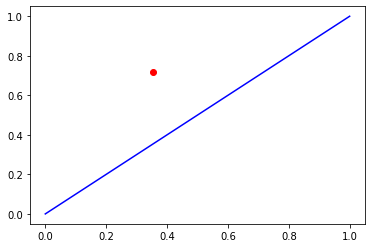

In [179]:
print("==========ANÁLISIS ROC VALIDACIÓN SIMPLE TIC-TAC-TOE DATA LAPLACE=TRUE===========")
clasificador2 = ClasificadorNaiveBayes(True)
clasificador2.entrenamiento(dataset2, estrategia2.particiones[0].indicesTrain)
pred = clasificador2.clasifica(dataset2, estrategia2.particiones[0].indicesTest)
ret = clasificador2.error(dataset2.extraeDatos(estrategia2.particiones[0].indicesTest), pred)
clasificador2.matrizConfusion(dataset2, estrategia2.particiones[0].indicesTest, pred)
clasificador2.curvaROC()
print("=================================================================================")

==========ANÁLISIS ROC VALIDACIÓN SIMPLE TIC-TAC-TOE DATA LAPLACE=FALSE==========


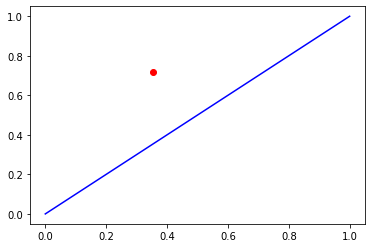

In [180]:
print("==========ANÁLISIS ROC VALIDACIÓN SIMPLE TIC-TAC-TOE DATA LAPLACE=FALSE==========")
clasificador20 = ClasificadorNaiveBayes(False)
clasificador20.entrenamiento(dataset2, estrategia2.particiones[0].indicesTrain)
pred = clasificador20.clasifica(dataset2, estrategia2.particiones[0].indicesTest)
ret = clasificador20.error(dataset2.extraeDatos(estrategia2.particiones[0].indicesTest), pred)
clasificador20.matrizConfusion(dataset2, estrategia2.particiones[0].indicesTest, pred)
clasificador20.curvaROC()
print("=================================================================================")

===============ANÁLISIS ROC VALIDACIÓN SIMPLE GERMAN DATA LAPLACE=TRUE===========


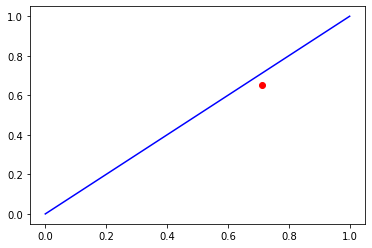

In [181]:
print("===============ANÁLISIS ROC VALIDACIÓN SIMPLE GERMAN DATA LAPLACE=TRUE===========")
clasificador3 = ClasificadorNaiveBayes(True)
clasificador3.entrenamiento(dataset3, estrategia3.particiones[0].indicesTrain)
pred = clasificador3.clasifica(dataset3, estrategia3.particiones[0].indicesTest)
ret = clasificador3.error(dataset3.extraeDatos(estrategia3.particiones[0].indicesTest), pred)
clasificador3.matrizConfusion(dataset3, estrategia3.particiones[0].indicesTest, pred)
clasificador3.curvaROC()
print("=================================================================================")

===============ANÁLISIS ROC VALIDACIÓN SIMPLE GERMAN DATA LAPLACE=FALSE==========


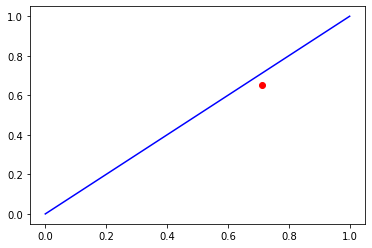

In [182]:
print("===============ANÁLISIS ROC VALIDACIÓN SIMPLE GERMAN DATA LAPLACE=FALSE==========")
clasificador30 = ClasificadorNaiveBayes(False)
clasificador30.entrenamiento(dataset3, estrategia3.particiones[0].indicesTrain)
pred = clasificador30.clasifica(dataset3, estrategia3.particiones[0].indicesTest)
ret = clasificador30.error(dataset3.extraeDatos(estrategia3.particiones[0].indicesTest), pred)
clasificador30.matrizConfusion(dataset3, estrategia3.particiones[0].indicesTest, pred)
clasificador30.curvaROC()
print("=================================================================================")

==========ANÁLISIS ROC VALIDACIÓN CRUZADA TIC-TAC-TOE DATA LAPLACE=TRUE===========


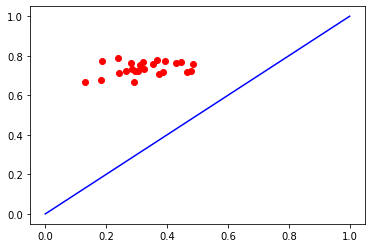

In [183]:
print("==========ANÁLISIS ROC VALIDACIÓN CRUZADA TIC-TAC-TOE DATA LAPLACE=TRUE===========")
clasificador21 = ClasificadorNaiveBayes(True)
for particion in estrategia21.particiones:
    clasificador21.entrenamiento(dataset2, particion.indicesTrain)
    pred = clasificador21.clasifica(dataset2, particion.indicesTest)
    ret = clasificador21.error(dataset2.extraeDatos(particion.indicesTest), pred)
    clasificador21.matrizConfusion(dataset2, particion.indicesTest, pred)
clasificador21.curvaROC()
print("==================================================================================")

==========ANÁLISIS ROC VALIDACIÓN CRUZADA TIC-TAC-TOE DATA LAPLACE=FALSE===========


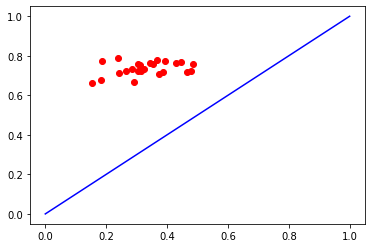

In [184]:
print("==========ANÁLISIS ROC VALIDACIÓN CRUZADA TIC-TAC-TOE DATA LAPLACE=FALSE===========")
clasificador22 = ClasificadorNaiveBayes(False)
for particion in estrategia21.particiones:
    clasificador22.entrenamiento(dataset2, particion.indicesTrain)
    pred = clasificador22.clasifica(dataset2, particion.indicesTest)
    ret = clasificador22.error(dataset2.extraeDatos(particion.indicesTest), pred)
    clasificador22.matrizConfusion(dataset2, particion.indicesTest, pred)
clasificador22.curvaROC()
print("==================================================================================")

===============ANÁLISIS ROC VALIDACIÓN CRUZADA GERMAN DATA LAPLACE=TRUE===========


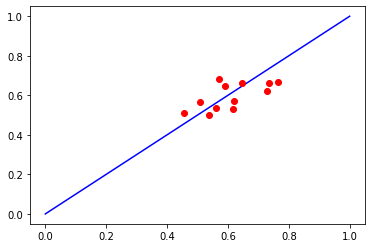

In [185]:
print("===============ANÁLISIS ROC VALIDACIÓN CRUZADA GERMAN DATA LAPLACE=TRUE===========")
clasificador31 = ClasificadorNaiveBayes(True)
for particion in estrategia31.particiones:    
    clasificador31.entrenamiento(dataset3, particion.indicesTrain)
    pred = clasificador31.clasifica(dataset3, particion.indicesTest)
    ret = clasificador31.error(dataset3.extraeDatos(particion.indicesTest), pred)
    clasificador31.matrizConfusion(dataset3, particion.indicesTest, pred)
clasificador31.curvaROC()
print("===================================================================================")

===============ANÁLISIS ROC VALIDACIÓN CRUZADA GERMAN DATA LAPLACE=FALSE===========


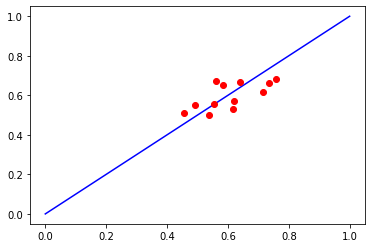

In [186]:
print("===============ANÁLISIS ROC VALIDACIÓN CRUZADA GERMAN DATA LAPLACE=FALSE===========")
clasificador32 = ClasificadorNaiveBayes(False)
for particion in estrategia31.particiones:    
    clasificador32.entrenamiento(dataset3, particion.indicesTrain)
    pred = clasificador32.clasifica(dataset3, particion.indicesTest)
    ret = clasificador32.error(dataset3.extraeDatos(particion.indicesTest), pred)
    clasificador32.matrizConfusion(dataset3, particion.indicesTest, pred)
clasificador32.curvaROC()
print("===================================================================================")